## In the first section we will look at existing crypto data (XRP) and apply data analytics techniques to uncover trends and identify patterns. 

#### Importing required library

In [2]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2)
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
root_dir = os.getcwd()
root_dir

'd:\\Data_Analytics_Projects\\XRP_project'

In [4]:
## Reading all the csv data
os.listdir(root_dir)
data_path = os.path.join(root_dir,'data')
data_path

'd:\\Data_Analytics_Projects\\XRP_project\\data'

#### 1.  Collect data for the year 2023 (months Jan-Dec) from the link below:

In [5]:
csvfile_paths = glob.glob(data_path + "/*.csv")
df = pd.DataFrame()
for path in csvfile_paths:
    temp_df = pd.read_csv(path,header=None)
    print(f"path:{path} , shape:{temp_df.shape}")
    df = pd.concat([df,temp_df],ignore_index=True)
print("===============================")
print(f"combine data: {df.shape}")   
df.to_csv("2023_XRP_data.csv",index=False)

path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-01.csv , shape:(31, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-02.csv , shape:(28, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-03.csv , shape:(31, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-04.csv , shape:(30, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-05.csv , shape:(31, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-06.csv , shape:(30, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-07.csv , shape:(31, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-08.csv , shape:(31, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-09.csv , shape:(30, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-10.csv , shape:(31, 12)
path:d:\Data_Analytics_Projects\XRP_project\data\XRPUSDT-1d-2023-11.csv , shape:(30, 12)
combine data: (334, 1

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0


In [7]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [8]:
df.shape

(334, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       334 non-null    int64  
 1   1       334 non-null    float64
 2   2       334 non-null    float64
 3   3       334 non-null    float64
 4   4       334 non-null    float64
 5   5       334 non-null    float64
 6   6       334 non-null    int64  
 7   7       334 non-null    float64
 8   8       334 non-null    int64  
 9   9       334 non-null    float64
 10  10      334 non-null    float64
 11  11      334 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 31.4 KB


#### 2. Importing final dataset file

In [10]:
import pandas as pd
final_df = pd.read_csv("2023_XRP_data.csv")
final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0


#### 3&4. This parameters/features from  SPOT -> Klines  git repo provided in question

In [11]:
columns = ["Open time",
           "Open",
           "High",
           "Low",
           "Close",
           "Volume",
           "Close time",
           "Quote asset volume",
           "Number of trades",
           "Taker buy base asset volume",
           "Taker buy quote asset volume",
           "Ignore"]
final_df.columns = columns

In [12]:
final_df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

- **Open time:** This is the timestamp when the trading period began or opened.

- **Open:** This is the opening or beginning price when the trading period began.

- **High:** This is the highest price reached during the specific trading period.

- **Low:** This is the lowest price recorded during the trading period.

- **Close:** This is the closing price of the trading period, the price the trading closed.

- **Volume:** This is the trading volume during the period. The entire trade volume for the period of trade

- **Close time:** This is the timestamp when the trading period closed.

- **Quote asset volume:** This is the volume of the quoted asset (usually in terms of the base cryptocurrency).

- **Number of trades:** This is the total number of trades that occurred.

- **Taker buy base asset volume:** Volume bought by takers (market orders) in terms of the base cryptocurrency.

- **Taker buy quote asset volume:** Volume bought by takers in terms of the quoted asset.

- **Ignore:** A column for remarks.

##### Data Formating

In [13]:
dict = {"Open time":"open_time",
           "Open":"open",
           "High":"high",
           "Low":"low",
           "Close":"close",
           "Volume":"volume",
           "Close time":"close_time",
           "Quote asset volume":"quote_asset_volume",
           "Number of trades":"number_of_trades",
           "Taker buy base asset volume":"taker_buy_base_asset_volume",
           "Taker buy quote asset volume":"taker_buy_quote_asset_volume",
           "Ignore":"ignore"}
 
# call rename () method
final_df.rename(columns=dict,
          inplace=True)

## ========================================================================== 

#### 5. Clean the data for duplicates, missing values and any formatting errors. Specify a summary of cleaning done and results achieved

In [14]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0


In [15]:
final_df.isnull().sum()

open_time                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open_time                     334 non-null    int64  
 1   open                          334 non-null    float64
 2   high                          334 non-null    float64
 3   low                           334 non-null    float64
 4   close                         334 non-null    float64
 5   volume                        334 non-null    float64
 6   close_time                    334 non-null    int64  
 7   quote_asset_volume            334 non-null    float64
 8   number_of_trades              334 non-null    int64  
 9   taker_buy_base_asset_volume   334 non-null    float64
 10  taker_buy_quote_asset_volume  334 non-null    float64
 11  ignore                        334 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 31.4 KB


##### Check Duplicate Data in our DataFrame

In [17]:
final_df.duplicated(keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 334, dtype: bool

In [18]:
final_df.duplicated().sum()

0

- There is no duplicate value present in the dataset.

##### Check Missing Values in our DataFrame

In [19]:
final_df.isnull().sum()

open_time                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

- There is no null value present in datset.

- There is no duplicate value present in the dataset.
- There is no missing value present in dataset.

# Question-6

In [20]:
# performing basic statistics
final_df.describe()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,3.340000e+02,334.000000,334.000000,334.000000,334.000000,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02,334.0
mean,1.686917e+12,0.500815,0.513903,0.486687,0.501621,3.687655e+08,1.687003e+12,1.885232e+08,2.217749e+05,1.861700e+08,9.505041e+07,0.0
std,8.342933e+09,0.099628,0.105421,0.094432,0.099406,2.409843e+08,8.342933e+09,1.528390e+08,2.182125e+05,1.208037e+08,7.652807e+07,0.0
min,1.672531e+12,0.338000,0.340000,0.300000,0.338000,6.313711e+07,1.672618e+12,3.298534e+07,3.836700e+04,2.745739e+07,1.434515e+07,0.0
25%,1.679724e+12,0.425475,0.433250,0.411675,0.426250,2.372122e+08,1.679810e+12,1.129748e+08,1.204495e+05,1.203629e+08,5.686124e+07,0.0
50%,1.686917e+12,0.495200,0.503450,0.482900,0.496000,3.311161e+08,1.687003e+12,1.531889e+08,1.674470e+05,1.700359e+08,8.066119e+07,0.0
75%,1.694110e+12,0.530150,0.546875,0.515925,0.531450,4.275825e+08,1.694196e+12,2.177888e+08,2.474530e+05,2.185932e+08,1.090932e+08,0.0
max,1.701302e+12,0.819800,0.938000,0.771000,0.819900,2.499971e+09,1.701389e+12,1.758483e+09,2.895839e+06,1.283335e+09,9.024119e+08,0.0


In [21]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
open_time,334.0,1.686917e+12,8.342933e+09,1.672531e+12,1.679724e+12,1.686917e+12,1.694110e+12,1.701302e+12
open,334.0,5.008153e-01,9.962790e-02,3.380000e-01,4.254750e-01,4.952000e-01,5.301500e-01,8.198000e-01
high,334.0,5.139027e-01,1.054209e-01,3.400000e-01,4.332500e-01,5.034500e-01,5.468750e-01,9.380000e-01
low,334.0,4.866868e-01,9.443174e-02,3.000000e-01,4.116750e-01,4.829000e-01,5.159250e-01,7.710000e-01
close,334.0,5.016213e-01,9.940615e-02,3.380000e-01,4.262500e-01,4.960000e-01,5.314500e-01,8.199000e-01
volume,334.0,3.687655e+08,2.409843e+08,6.313711e+07,2.372122e+08,3.311161e+08,4.275825e+08,2.499971e+09
close_time,334.0,1.687003e+12,8.342933e+09,1.672618e+12,1.679810e+12,1.687003e+12,1.694196e+12,1.701389e+12
quote_asset_volume,334.0,1.885232e+08,1.528390e+08,3.298534e+07,1.129748e+08,1.531889e+08,2.177888e+08,1.758483e+09
number_of_trades,334.0,2.217749e+05,2.182125e+05,3.836700e+04,1.204495e+05,1.674470e+05,2.474530e+05,2.895839e+06
taker_buy_base_asset_volume,334.0,1.861700e+08,1.208037e+08,2.745739e+07,1.203629e+08,1.700359e+08,2.185932e+08,1.283335e+09


#### Basic Statistics Conclusion:

###### Volume traded:
**Volume Range:** The data shows a wide variety of trading volumes ranging from a minimum of 6.313711e+07 to a maximum of 2.499971e+09 throughout the year.
With the 75th percentile being about 4.283734e+08 units and the 25th percentile being about 2.375146e+08 units

###### Price Range:
**Opening Price:** The data shows the minimum opening price of 0.3380 and the maximum opening price of 0.8198 through the year.With the 75th percentile being about 0.5302 and the 25th percentile being about 0.4260.The mean price of the opening trade is 0.5013

**Closing Price:** The data shows the minimum closing price of 0.3380 and the maximum closing price of 0.8199 through the year.With the 75th percentile being about 0.5319 and the 25th percentile being about 0.4273.The mean price of the opening trade is 0.5021

#### There are 333 records in the dataset.

- The data is from  02 Jan 2023 to 29 Nov 2023.

- The mean price of the opening trade is 0.5013

- The mean price of the closing trade is 0.5021

- The mean price of the volume is 3.6957 + e08

- The mean number of trades is 2.222948e+05

##### Showing Distribution for each column

In [22]:
final_df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')

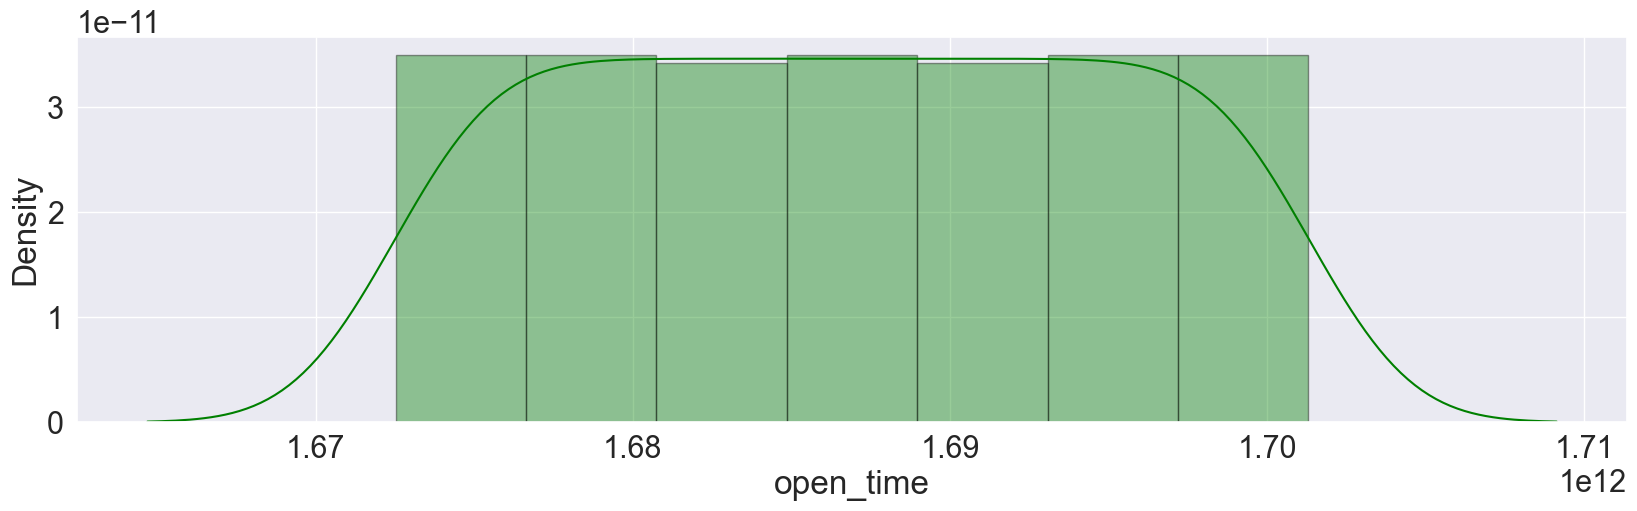

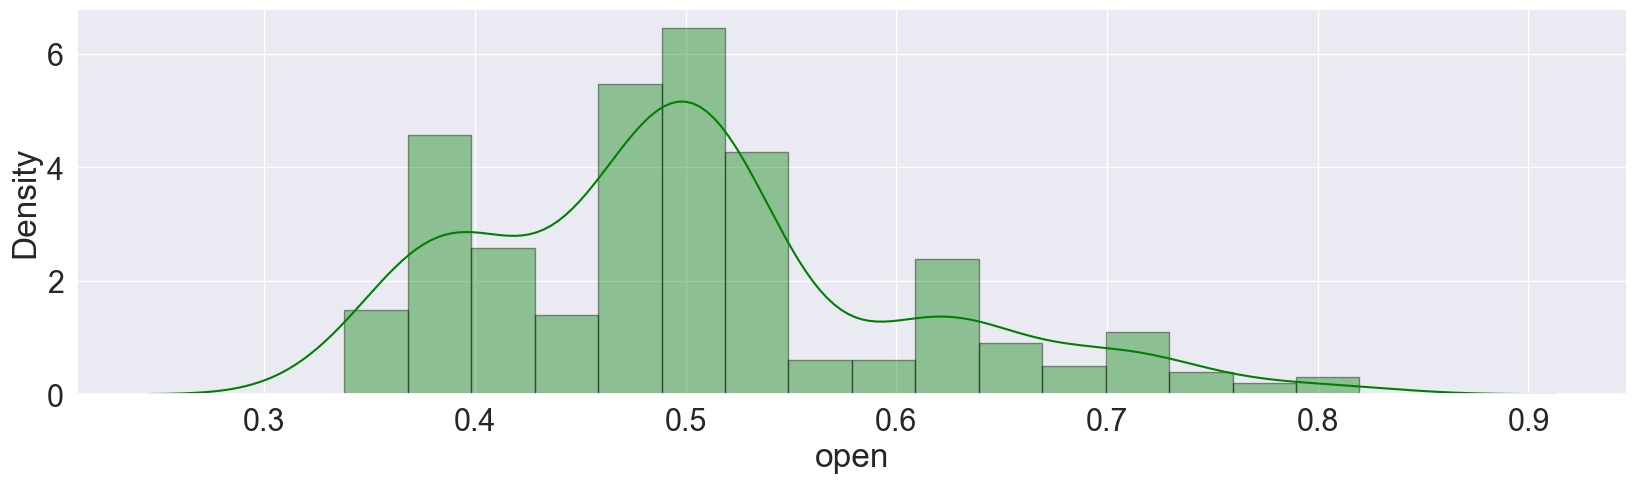

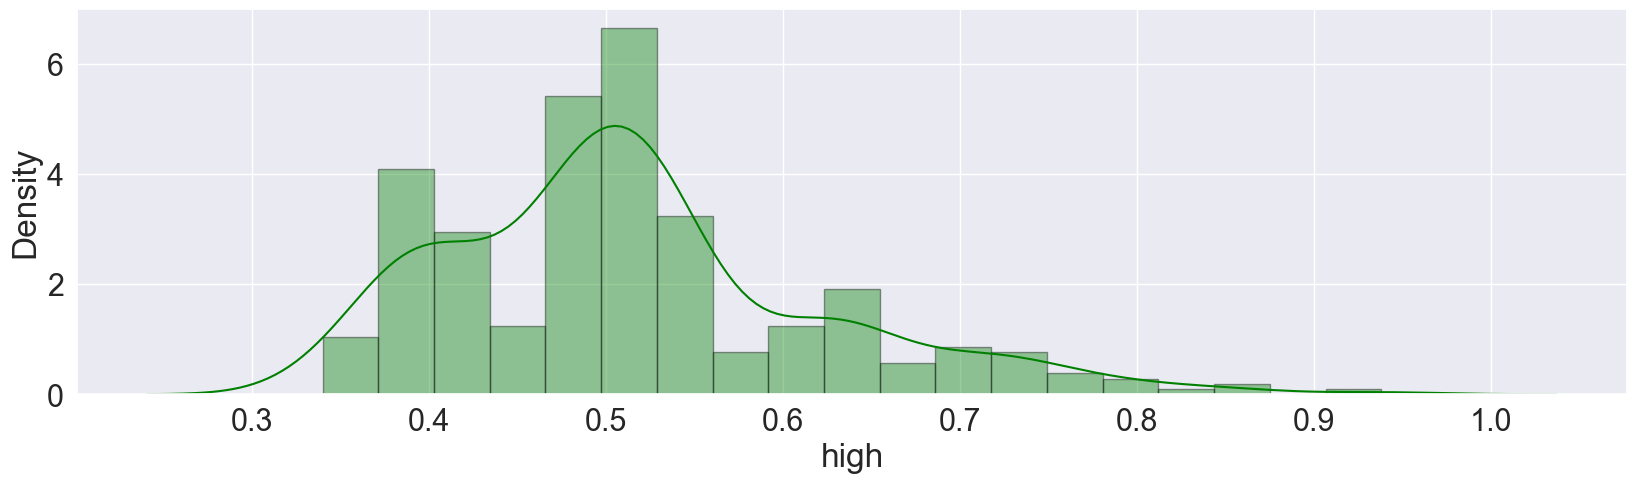

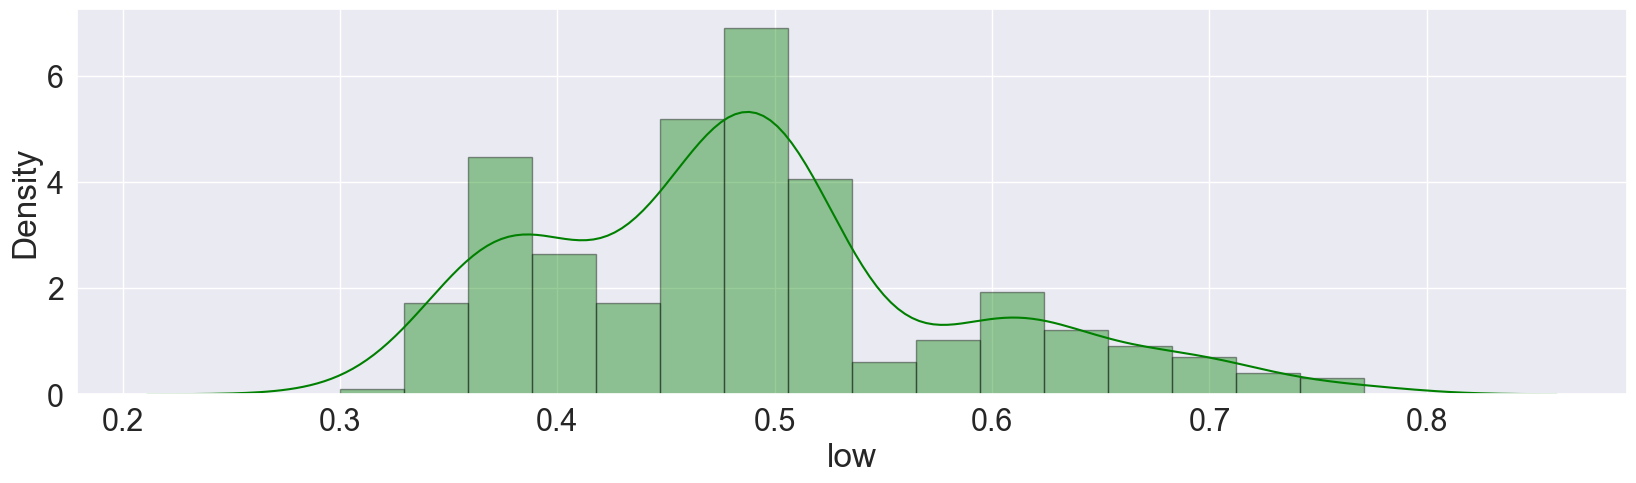

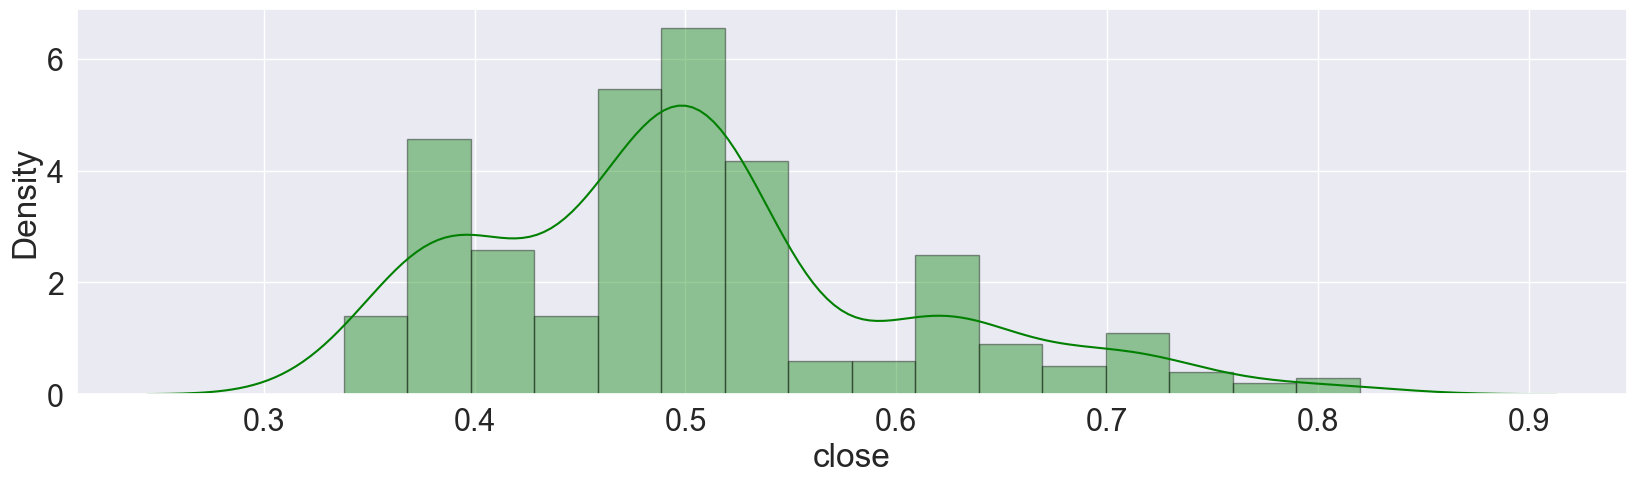

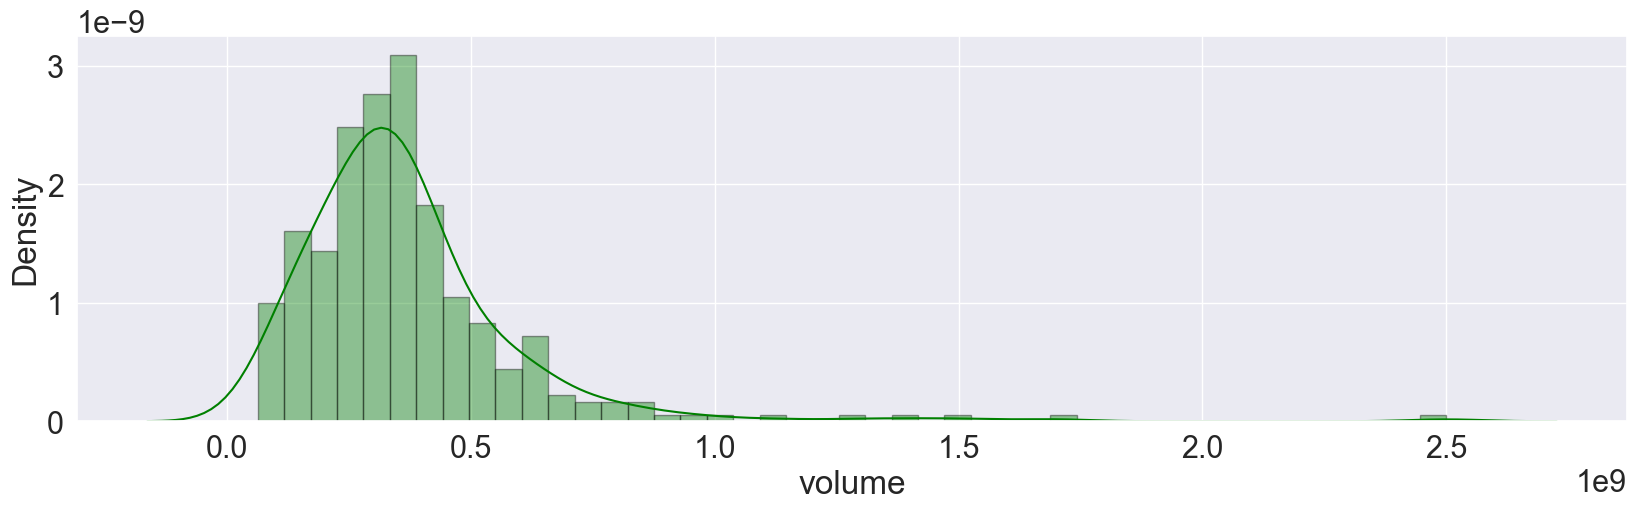

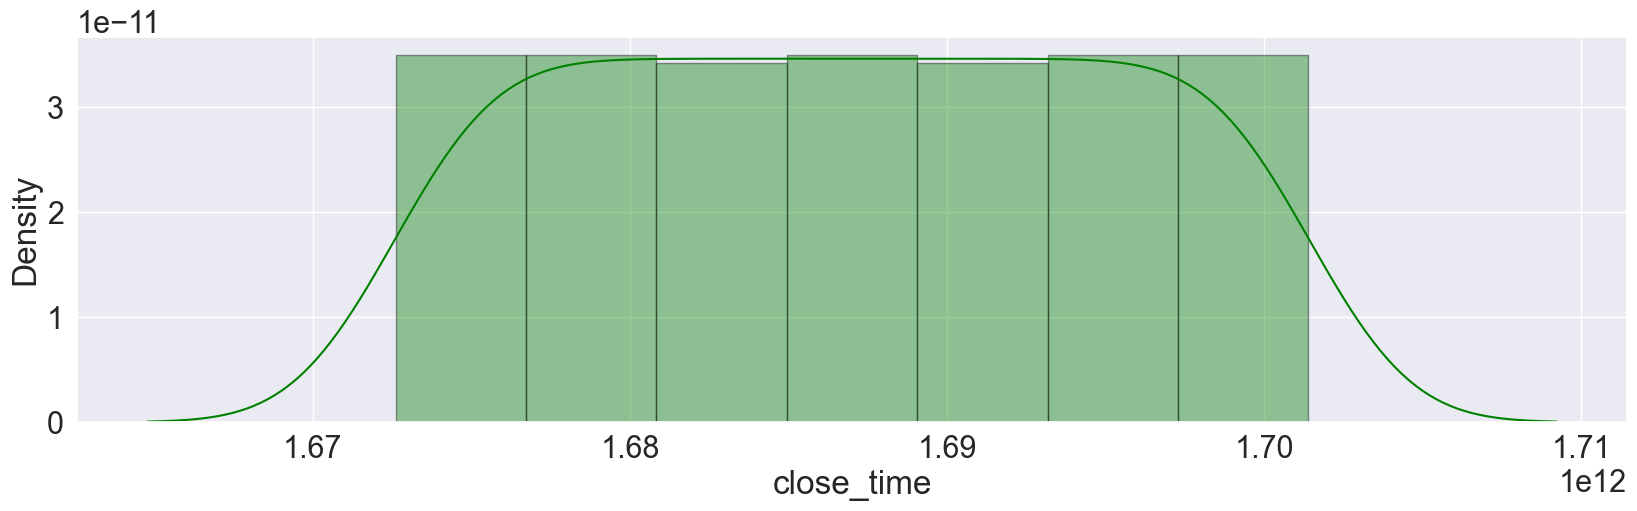

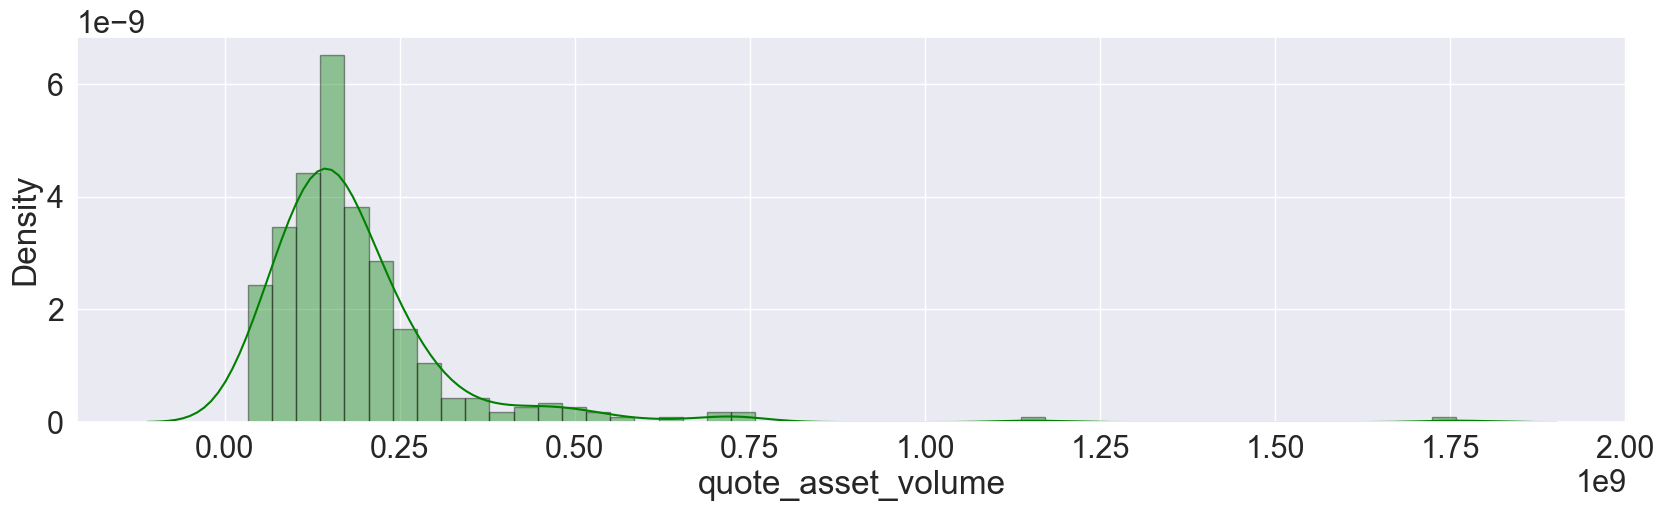

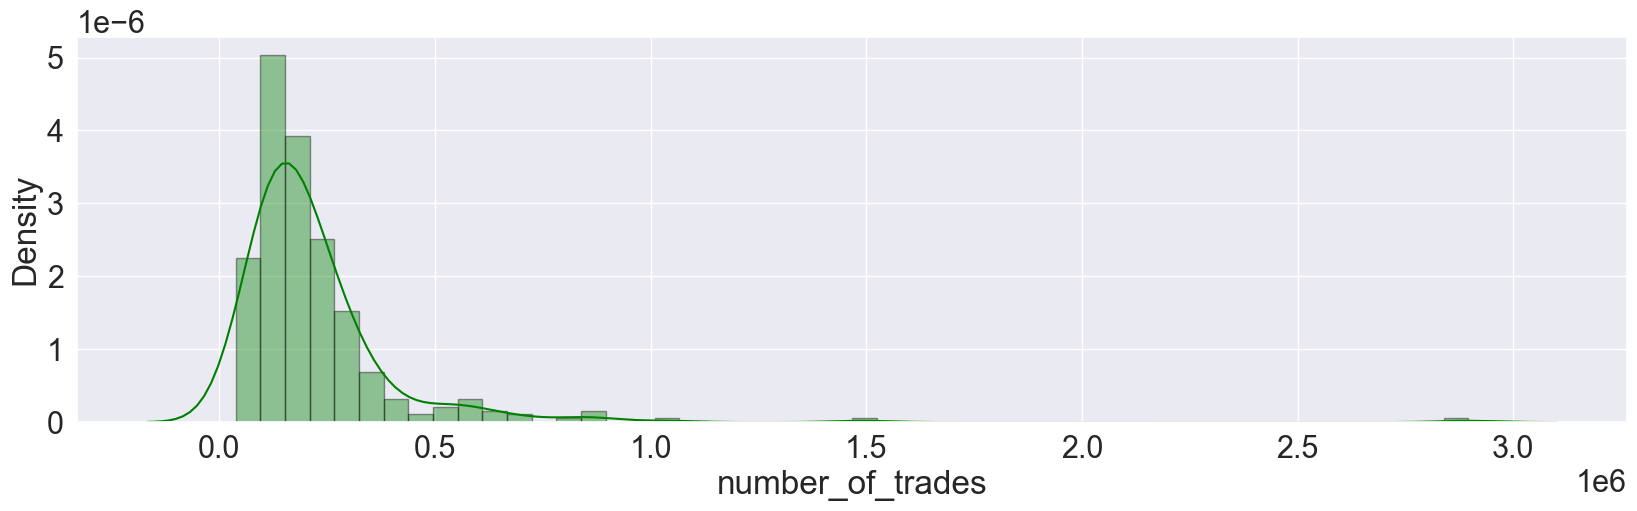

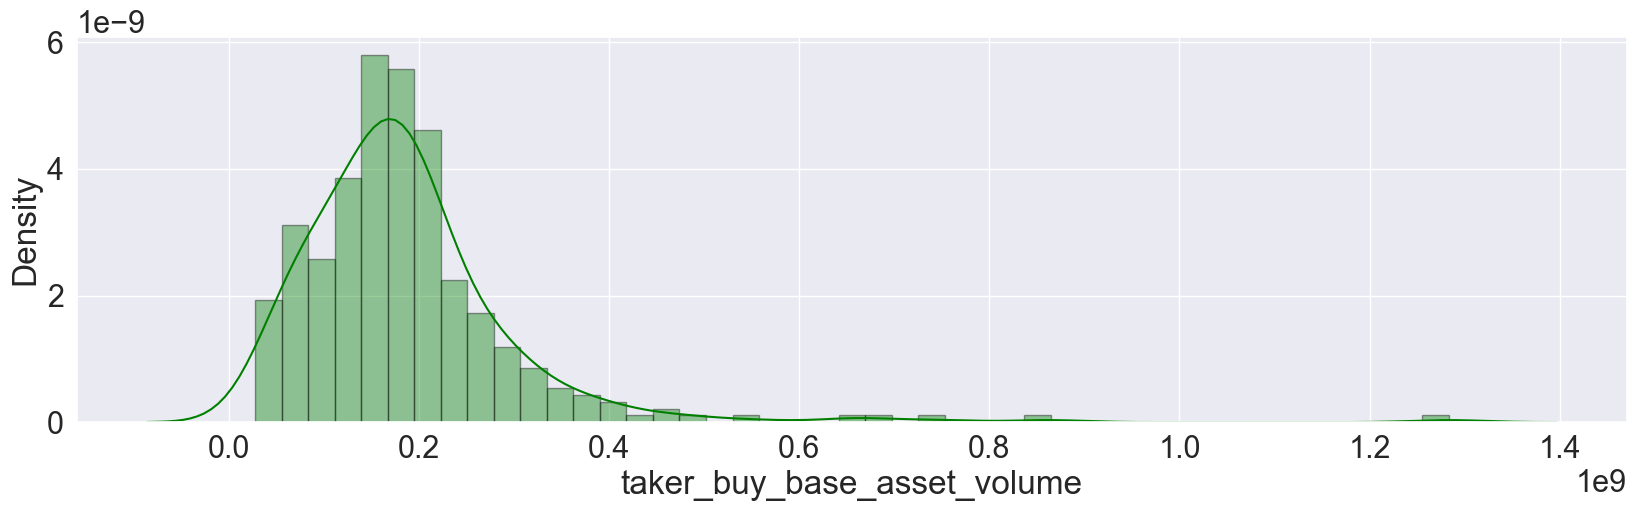

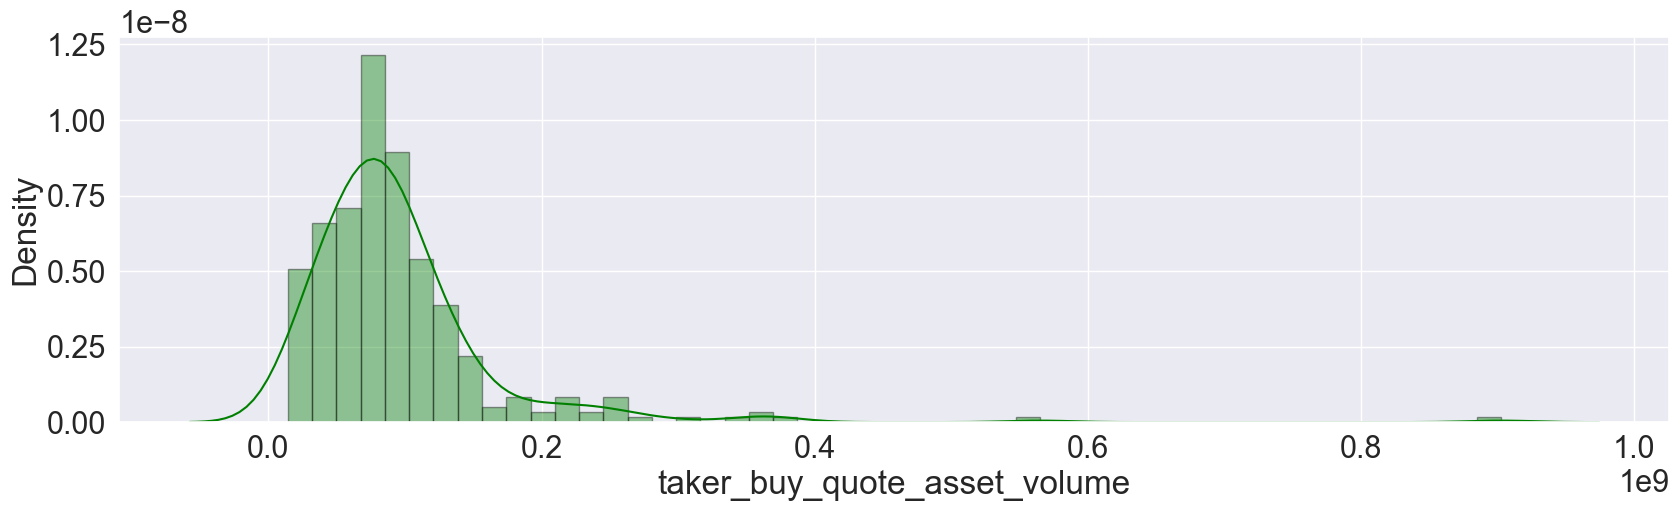

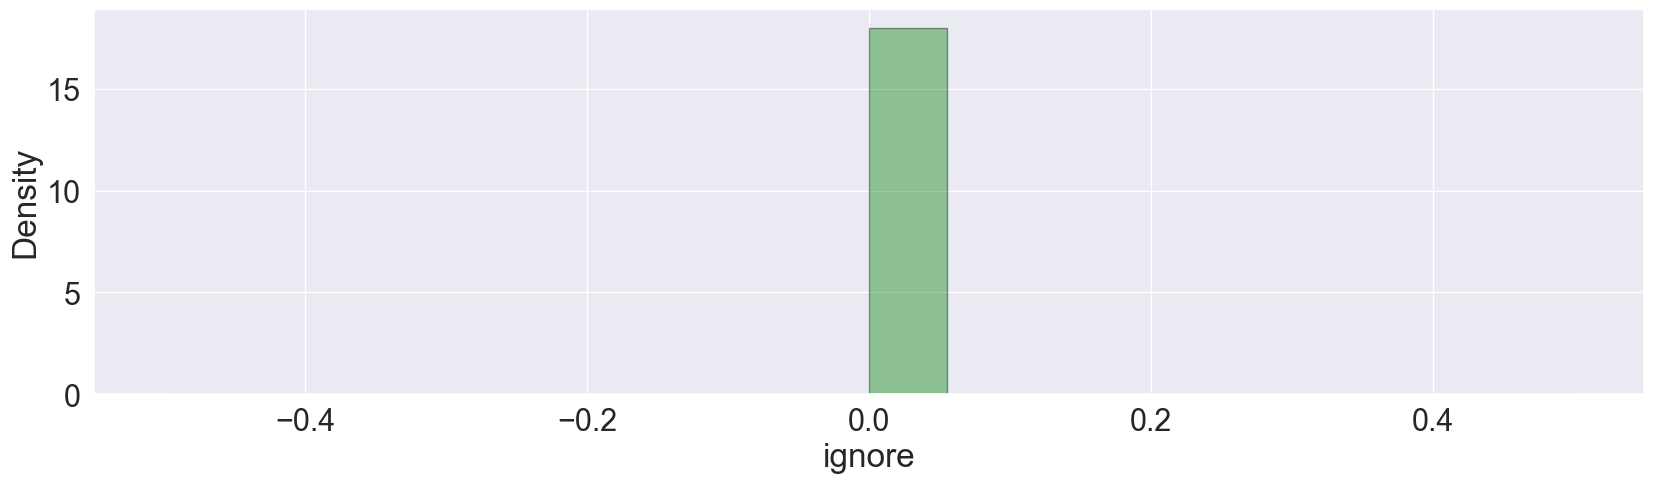

In [23]:
for clm in final_df.columns:
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.distplot(a=final_df[clm], color='green',hist_kws={"edgecolor": 'black'})
    plt.show()

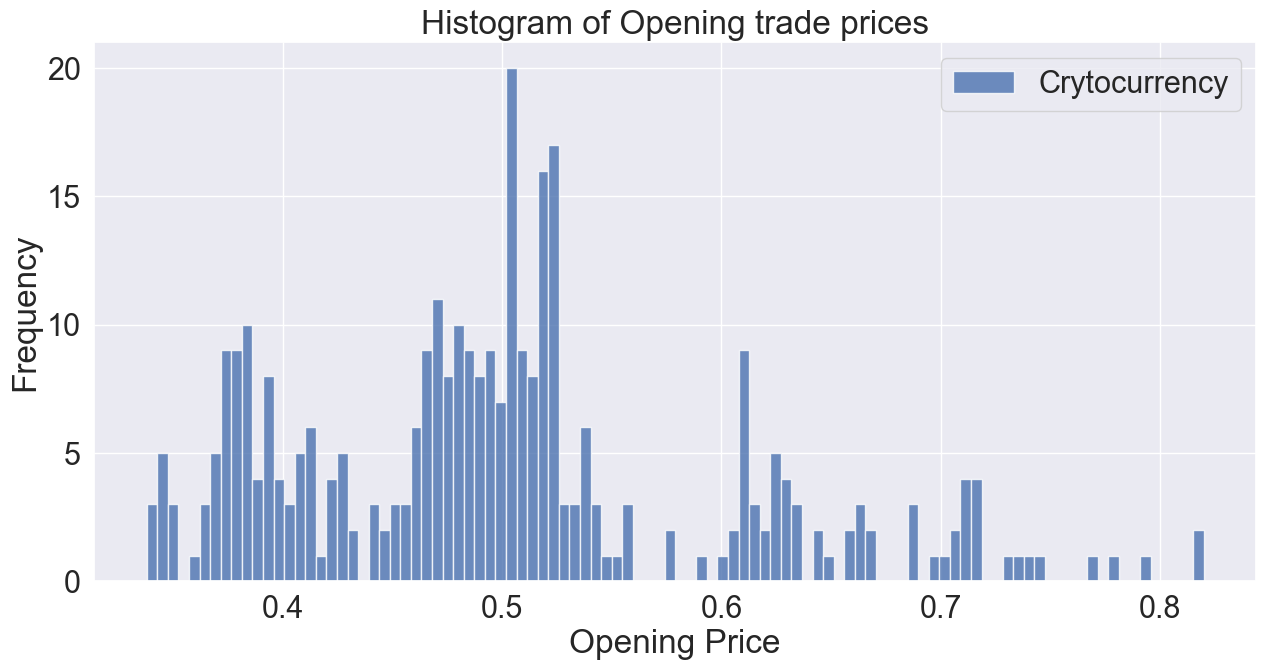

In [24]:
plt.figure(figsize=(15, 7))
plt.hist(final_df['open'], bins=100, label='Crytocurrency', alpha=0.8)
plt.title('Histogram of Opening trade prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

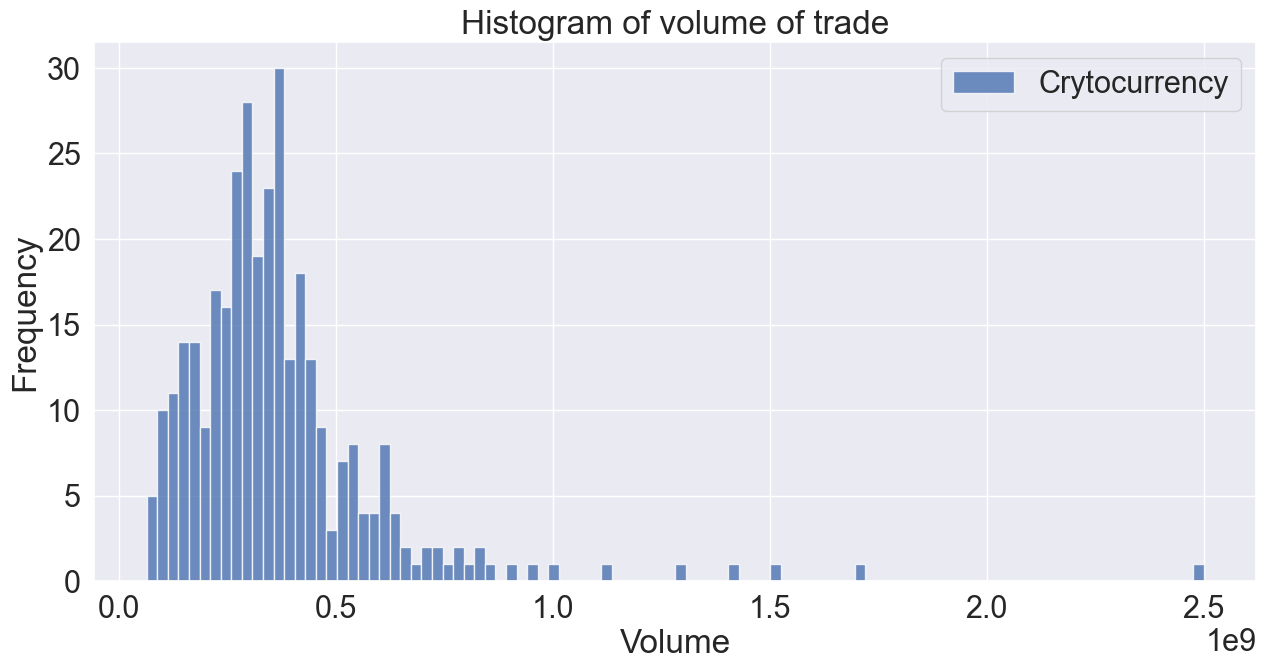

In [25]:
plt.figure(figsize=(15, 7))
plt.hist(final_df['volume'], bins=100, label='Crytocurrency', alpha=0.8)
plt.title('Histogram of volume of trade')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

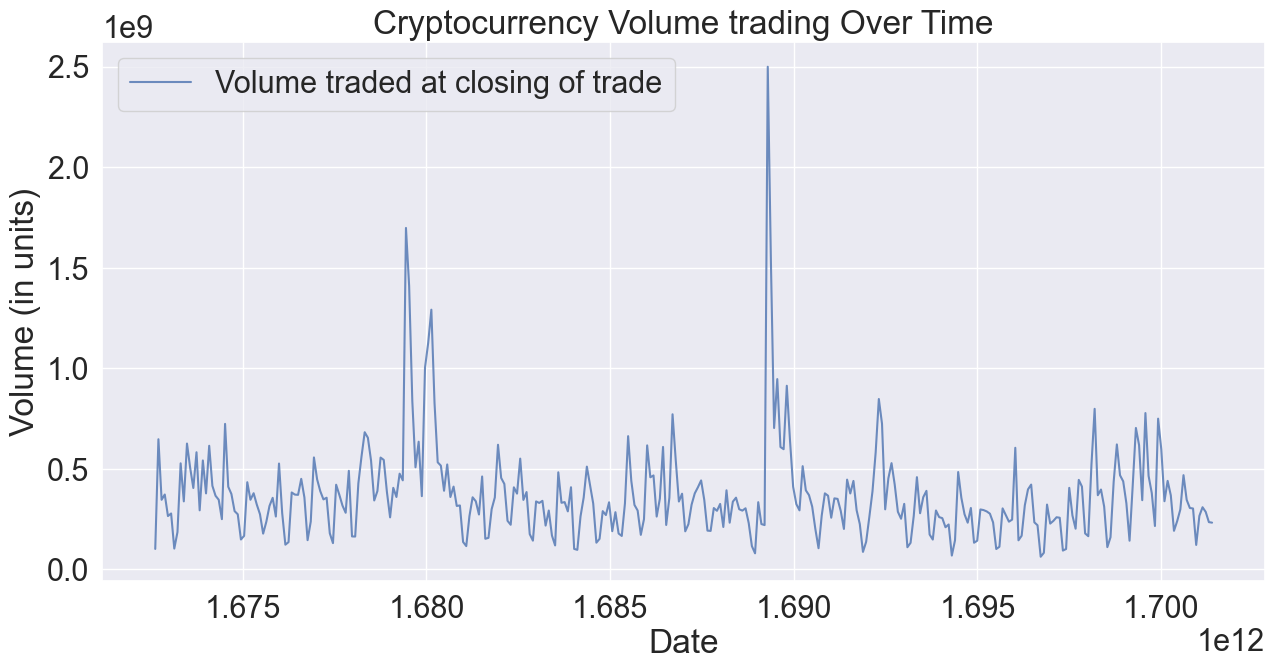

In [26]:
plt.figure(figsize=(15, 7))
# plt.plot(df['Close time'], df['Open'], label='BTCUSD', alpha=0.8)
# plt.plot(df['Close time'], df['Close'], label='ETHUSD', alpha=0.8)
plt.plot(final_df['close_time'], final_df['volume'], label='Volume traded at closing of trade', alpha=0.8)
plt.title('Cryptocurrency Volume trading Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in units)')
plt.legend()
plt.grid(True)
plt.show()

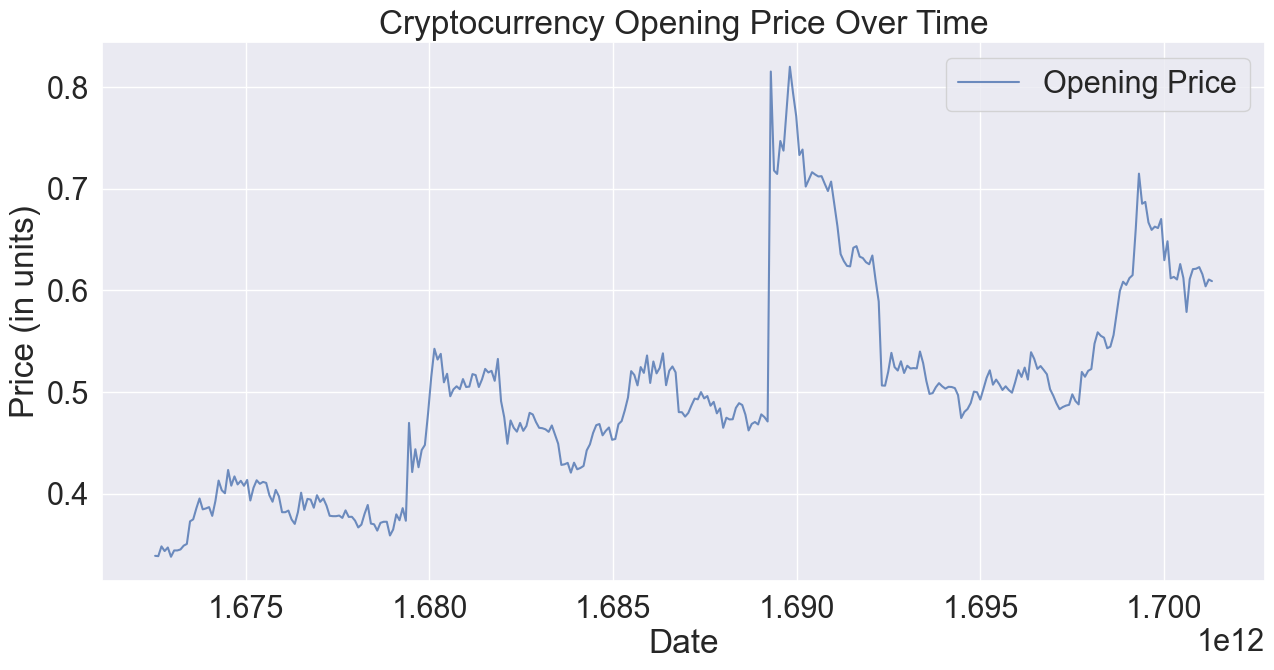

In [27]:
plt.figure(figsize=(15, 7))
plt.plot(final_df['open_time'], final_df['open'], label='Opening Price', alpha=0.8)
plt.title('Cryptocurrency Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (in units)')
plt.legend()
plt.grid(True)
plt.show()

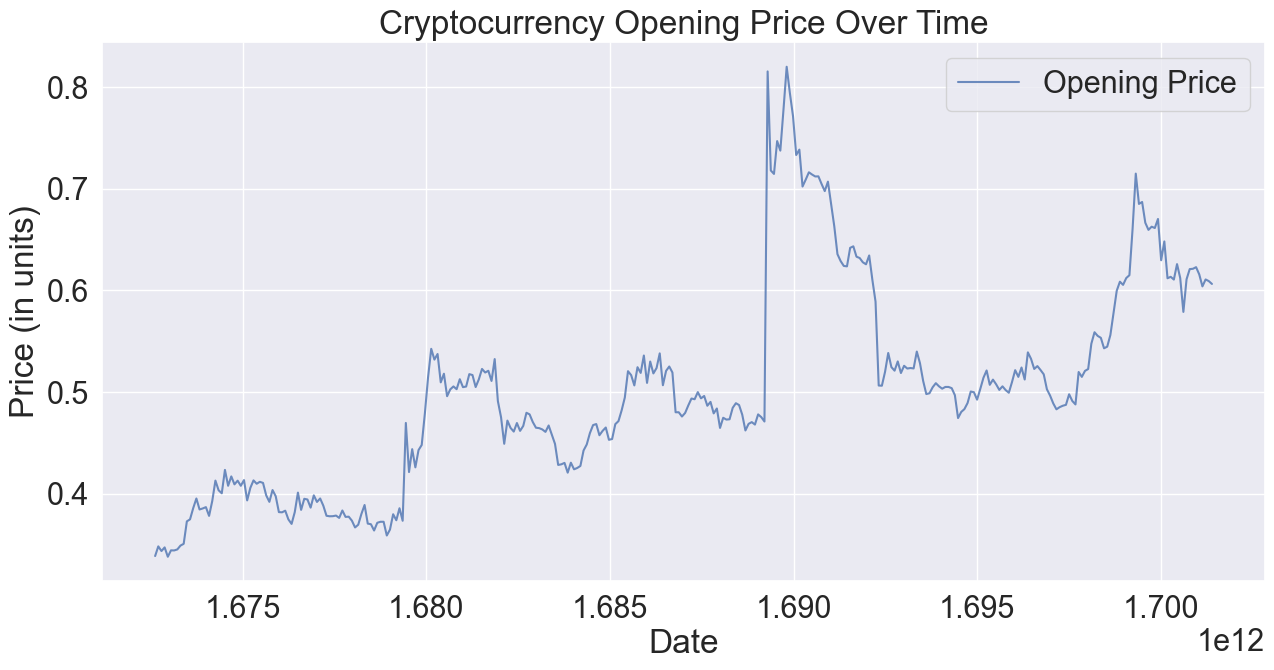

In [28]:
plt.figure(figsize=(15, 7))
plt.plot(final_df['close_time'], final_df['close'], label='Opening Price', alpha=0.8)
plt.title('Cryptocurrency Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (in units)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
df1 = final_df.copy()
df1['Daily_Return'] = df1['close'].pct_change()

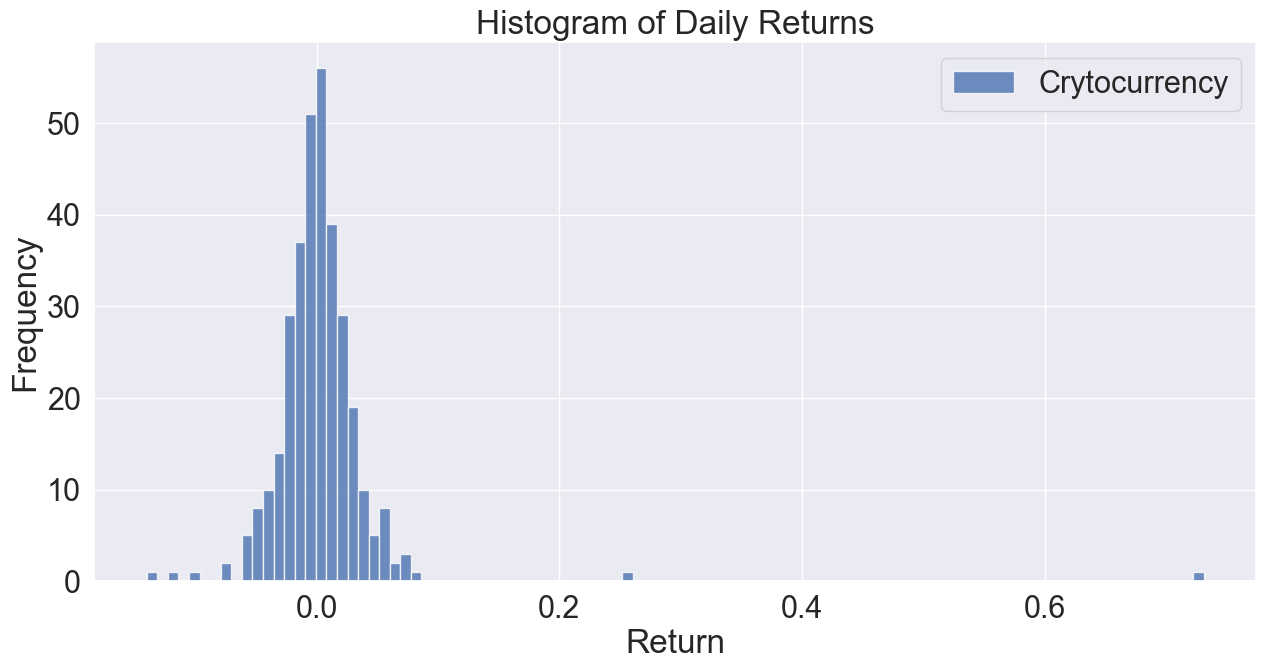

In [30]:
plt.figure(figsize=(15, 7))
plt.hist(df1['Daily_Return'].dropna(), bins=100, label='Crytocurrency', alpha=0.8)
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df1.index,
                                     open=df1['open'],
                                     high=df1['high'],
                                     low=df1['low'],
                                     close=df1['close'])])

# Add text annotation as a makeshift legend
fig.add_annotation(
    text='Open/High/Low/Close',
    align='left',
    valign='top',
    xref='paper', yref='paper',
    x=1, y=1,
    showarrow=False,
)

# Set font size for the annotation
fig.update_annotations(font_size=12)

fig.show()


## Feature Engineering

##### Feature Extraction for Open Time

In [32]:
# Convert the 'open_time' column to datetime
final_df['open_time'] = pd.to_datetime(final_df['open_time'], format='%Y-%m-%d %H:%M:%S')
final_df.head()

ValueError: time data "1672531200000" doesn't match format "%Y-%m-%d %H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Split the date and time into separate columns
final_df['open_date'] = final_df['open_time'].dt.date
final_df['open_time'] = final_df['open_time'].dt.time

In [ ]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_date
0,00:27:52.531200,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0,1970-01-01
1,00:27:52.617600,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0,1970-01-01
2,00:27:52.704000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0,1970-01-01
3,00:27:52.790400,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0,1970-01-01
4,00:27:52.876800,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0,1970-01-01


# Not Important right now

In [ ]:
# Extract year, month, day, day of the week, quarter, and season as new features
final_df['o_year'] = final_df['open_time'].dt.year
final_df['o_month'] = final_df['open_time'].dt.month
final_df['o_day'] = final_df['open_time'].dt.day
final_df['o_DayOfWeek'] = final_df['open_time'].dt.dayofweek
final_df['o_Quarter'] = final_df['open_time'].dt.quarter
# Print the data types
#print(final_df[['year', 'month', 'day']])

In [ ]:
# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a new 'Season' column
final_df['Season'] = final_df['o_month'].apply(get_season)

In [ ]:
final_df.head(5)

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,o_year,o_month,o_day,o_DayOfWeek,o_Quarter,Season
0,1970-01-01 00:27:52.531200,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0,1970,1,1,3,1,Winter
1,1970-01-01 00:27:52.617600,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0,1970,1,1,3,1,Winter
2,1970-01-01 00:27:52.704000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0,1970,1,1,3,1,Winter
3,1970-01-01 00:27:52.790400,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0,1970,1,1,3,1,Winter
4,1970-01-01 00:27:52.876800,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0,1970,1,1,3,1,Winter


# TIll here

##### Feature Extraction for Close time

In [ ]:
# Convert the 'open_time' column to datetime
final_df['close_time'] = pd.to_datetime(final_df['close_time'], format='%Y-%m-%d %H:%M:%S')
# Split the date and time into separate columns
final_df['close_date'] = final_df['close_time'].dt.date
final_df['close_time'] = final_df['close_time'].dt.time

final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_date,close_date
0,00:27:52.531200,0.3389,0.3400,0.3354,0.3387,102026821.0,00:27:52.617599,3.447164e+07,48661,53592277.0,1.810790e+07,0,1970-01-01,1970-01-01
1,00:27:52.617600,0.3386,0.3555,0.3000,0.3482,647520487.0,00:27:52.703999,2.178040e+08,285660,320823575.0,1.080569e+08,0,1970-01-01,1970-01-01
2,00:27:52.704000,0.3482,0.3520,0.3395,0.3436,346410334.0,00:27:52.790399,1.195113e+08,154113,172318472.0,5.944846e+07,0,1970-01-01,1970-01-01
3,00:27:52.790400,0.3436,0.3605,0.3390,0.3472,372672796.0,00:27:52.876799,1.295853e+08,147677,193027855.0,6.713928e+07,0,1970-01-01,1970-01-01
4,00:27:52.876800,0.3471,0.3487,0.3333,0.3380,265529668.0,00:27:52.963199,9.073585e+07,106910,129294274.0,4.418781e+07,0,1970-01-01,1970-01-01


# Not important from here

In [ ]:
# Extract year, month, day, day of the week, quarter, and season as new features
final_df['c_year'] = final_df['close_time'].dt.year
final_df['c_month'] = final_df['close_time'].dt.month
final_df['c_day'] = final_df['close_time'].dt.day
final_df['c_DayOfWeek'] = final_df['close_time'].dt.dayofweek
final_df['c_Quarter'] = final_df['close_time'].dt.quarter
# Print the data types
#print(final_df[['year', 'month', 'day']])

In [ ]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,o_year,o_month,o_day,o_DayOfWeek,o_Quarter,Season,c_year,c_month,c_day,c_DayOfWeek,c_Quarter
0,1970-01-01 00:27:52.531200,0.3389,0.3400,0.3354,0.3387,102026821.0,1970-01-01 00:27:52.617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0,1970,1,1,3,1,Winter,1970,1,1,3,1
1,1970-01-01 00:27:52.617600,0.3386,0.3555,0.3000,0.3482,647520487.0,1970-01-01 00:27:52.703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0,1970,1,1,3,1,Winter,1970,1,1,3,1
2,1970-01-01 00:27:52.704000,0.3482,0.3520,0.3395,0.3436,346410334.0,1970-01-01 00:27:52.790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0,1970,1,1,3,1,Winter,1970,1,1,3,1
3,1970-01-01 00:27:52.790400,0.3436,0.3605,0.3390,0.3472,372672796.0,1970-01-01 00:27:52.876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0,1970,1,1,3,1,Winter,1970,1,1,3,1
4,1970-01-01 00:27:52.876800,0.3471,0.3487,0.3333,0.3380,265529668.0,1970-01-01 00:27:52.963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0,1970,1,1,3,1,Winter,1970,1,1,3,1


# TIll here

In [ ]:
final_df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore', 'open_date', 'close_date'],
      dtype='object')

In [ ]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_date,close_date
0,00:27:52.531200,0.3389,0.3400,0.3354,0.3387,102026821.0,00:27:52.617599,3.447164e+07,48661,53592277.0,1.810790e+07,0,1970-01-01,1970-01-01
1,00:27:52.617600,0.3386,0.3555,0.3000,0.3482,647520487.0,00:27:52.703999,2.178040e+08,285660,320823575.0,1.080569e+08,0,1970-01-01,1970-01-01
2,00:27:52.704000,0.3482,0.3520,0.3395,0.3436,346410334.0,00:27:52.790399,1.195113e+08,154113,172318472.0,5.944846e+07,0,1970-01-01,1970-01-01
3,00:27:52.790400,0.3436,0.3605,0.3390,0.3472,372672796.0,00:27:52.876799,1.295853e+08,147677,193027855.0,6.713928e+07,0,1970-01-01,1970-01-01
4,00:27:52.876800,0.3471,0.3487,0.3333,0.3380,265529668.0,00:27:52.963199,9.073585e+07,106910,129294274.0,4.418781e+07,0,1970-01-01,1970-01-01


In [ ]:
# Drop unwanted columns
final_df.drop([ 'ignore', 
               'quote_asset_volume', 
               'taker_buy_base_asset_volume', 
               'taker_buy_quote_asset_volume'], axis=1, inplace=True)

In [ ]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,number_of_trades,open_date,close_date
0,00:27:52.531200,0.3389,0.3400,0.3354,0.3387,102026821.0,00:27:52.617599,48661,1970-01-01,1970-01-01
1,00:27:52.617600,0.3386,0.3555,0.3000,0.3482,647520487.0,00:27:52.703999,285660,1970-01-01,1970-01-01
2,00:27:52.704000,0.3482,0.3520,0.3395,0.3436,346410334.0,00:27:52.790399,154113,1970-01-01,1970-01-01
3,00:27:52.790400,0.3436,0.3605,0.3390,0.3472,372672796.0,00:27:52.876799,147677,1970-01-01,1970-01-01
4,00:27:52.876800,0.3471,0.3487,0.3333,0.3380,265529668.0,00:27:52.963199,106910,1970-01-01,1970-01-01


In [ ]:
final_df[['open', 'high', 'low', 'close']] = final_df[['open', 'high', 'low', 'close']] * 1000


In [ ]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,number_of_trades,open_date,close_date
0,00:27:52.531200,338.9,340.0,335.4,338.7,102026821.0,00:27:52.617599,48661,1970-01-01,1970-01-01
1,00:27:52.617600,338.6,355.5,300.0,348.2,647520487.0,00:27:52.703999,285660,1970-01-01,1970-01-01
2,00:27:52.704000,348.2,352.0,339.5,343.6,346410334.0,00:27:52.790399,154113,1970-01-01,1970-01-01
3,00:27:52.790400,343.6,360.5,339.0,347.2,372672796.0,00:27:52.876799,147677,1970-01-01,1970-01-01
4,00:27:52.876800,347.1,348.7,333.3,338.0,265529668.0,00:27:52.963199,106910,1970-01-01,1970-01-01


In [ ]:
# Summary statistics
numeric_cols = ['open', 'high', 'low', 'close']
summary_stats = final_df[numeric_cols].describe()
print(summary_stats)

             open        high         low       close
count  334.000000  334.000000  334.000000  334.000000
mean   500.815269  513.902695  486.686826  501.621257
std     99.627904  105.420910   94.431739   99.406154
min    338.000000  340.000000  300.000000  338.000000
25%    425.475000  433.250000  411.675000  426.250000
50%    495.200000  503.450000  482.900000  496.000000
75%    530.150000  546.875000  515.925000  531.450000
max    819.800000  938.000000  771.000000  819.900000


In [ ]:
# Line chart for 'Close' price over time (interactive)
import plotly.graph_objects as go
import plotly.express as px

fig = px.line(final_df, x='open_date', y='close', title='Close Price of Cryptocurrencies')
fig.update_layout(xaxis_title='Date', yaxis_title='Close Price')
fig.show()